### 13) 모형결합(랜덤포레스트)

In [1]:
# 랜덤포레스트: 의사결정나무를 개별 모형으로 사용하는 모형 결합 방법

# 배깅은 사용하는 모형의 종류에 제한이 없으나 랜덤포레스트는 의사결정나무 모형만을 사용한다.

# 독립변수의 차원을 랜덤하게 감소시킨 후 독립변수를 선택하는 방법

# csv 파일을 로딩

import pandas as pd

df = pd.read_csv("c:/workspace3/data/heart.csv")

df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [2]:
df["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

In [3]:
train_cols = df.columns[0:13]

X = df[train_cols] # 독립변수

y = df["target"]

In [4]:
#언더샘플링

from imblearn.under_sampling import RandomUnderSampler

X_sample, y_sample = RandomUnderSampler(random_state=0).fit_resample(X, y)

X_samp = pd.DataFrame(data=X_sample,columns=train_cols )

y_samp = pd.DataFrame(data=y_sample,columns=['target'])

df_samp=pd.concat([X_samp,y_samp],axis=1)

df_samp["target"].value_counts()

target
0    138
1    138
Name: count, dtype: int64

In [5]:
X = df_samp[train_cols] # 독립변수

y = df_samp["target"]

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

model1 = DecisionTreeClassifier(random_state=0)

model2 = RandomForestClassifier(n_estimators=100, random_state=0)

for model in (model1, model2):

    print(model)

    model.fit(X_train,y_train)

    print("학습용:",model.score(X_train, y_train))

    print("검증용:",model.score(X_test, y_test))

    print()

#랜덤포레스트의 변종으로 익스트림 랜덤 트리(Extemely Randomized Trees)

#  또는 엑스트라 트리(Extra Trees) 모형

# 랜덤포레스트를 개량한 모형

DecisionTreeClassifier(random_state=0)
학습용: 1.0
검증용: 0.6071428571428571

RandomForestClassifier(random_state=0)
학습용: 1.0
검증용: 0.75



In [8]:
from sklearn.ensemble import ExtraTreesClassifier

model3 = ExtraTreesClassifier(n_estimators=100, random_state=0)

for model in (model1, model2, model3):

    print(model)

    model.fit(X_train,y_train)

    print("학습용:",model.score(X_train, y_train))

    print("검증용:",model.score(X_test, y_test))

    print()

    

# DecisionTree < RandomForest < ExtraTree 순으로 성능이 개선됨  

DecisionTreeClassifier(random_state=0)
학습용: 1.0
검증용: 0.6071428571428571

RandomForestClassifier(random_state=0)
학습용: 1.0
검증용: 0.75

ExtraTreesClassifier(random_state=0)
학습용: 1.0
검증용: 0.8035714285714286



In [10]:
#트리를 만드는 결정에 각 특성이 얼마나 중요한지를 평가하는 특성 중요도 적용

#0~1 사이의 값(0 전혀 사용되지 않음 ~ 1 완벽하게 타겟 클래스 예측)

%matplotlib inline

import matplotlib.pyplot as plt

import numpy as np

def plot_tree(model):

    n_features = X.shape[1]

    plt.barh(range(n_features), model.feature_importances_, align='center')

    plt.yticks(np.arange(n_features), train_cols)
    plt.xlabel("importances")

    plt.ylabel("variables")

    plt.ylim(-1, n_features)

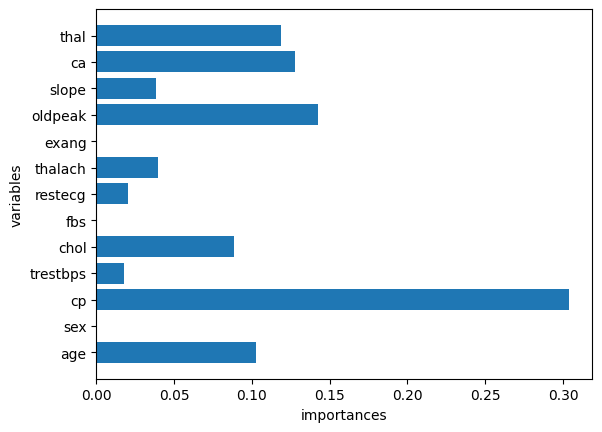

In [11]:
plot_tree(model1)

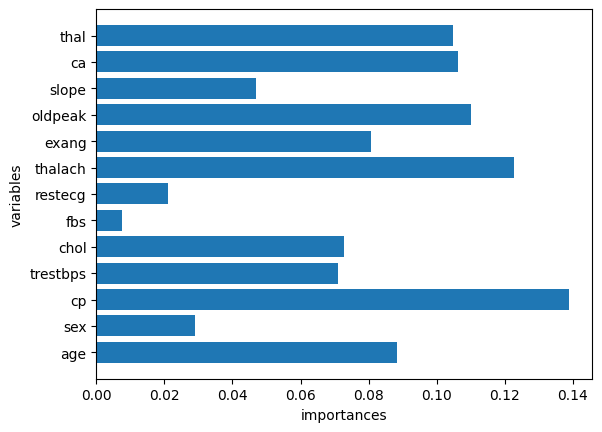

In [12]:
plot_tree(model2)

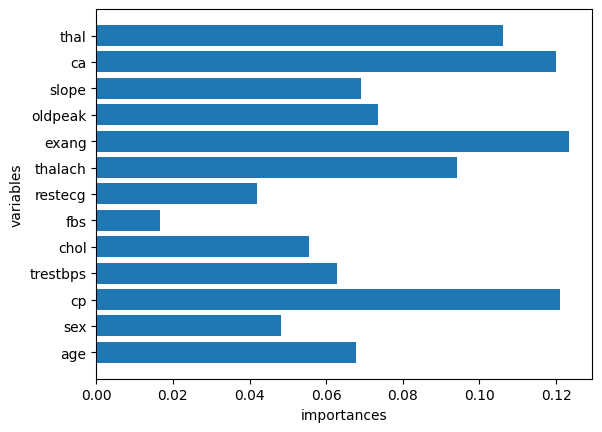

In [13]:
plot_tree(model3)